In [1]:
import fml_lib
import numpy as np
import pandas as pd
import sys
import scipy
import matplotlib.pyplot as plt

Q1: Using the formulation in Section 10.3, plot the bet size (m) as a function of the maximum predicted probability (p̃) when ‖X‖ = 2, 3,…, 10

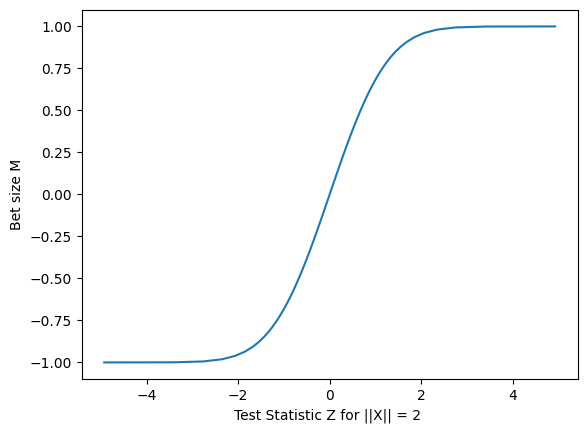

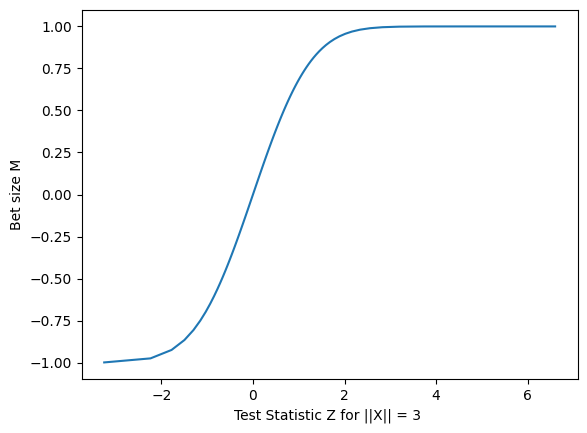

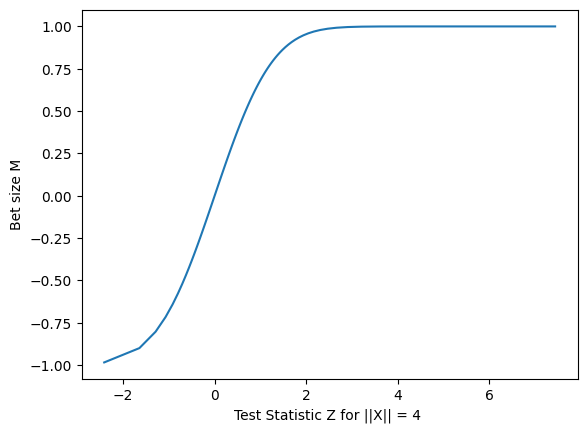

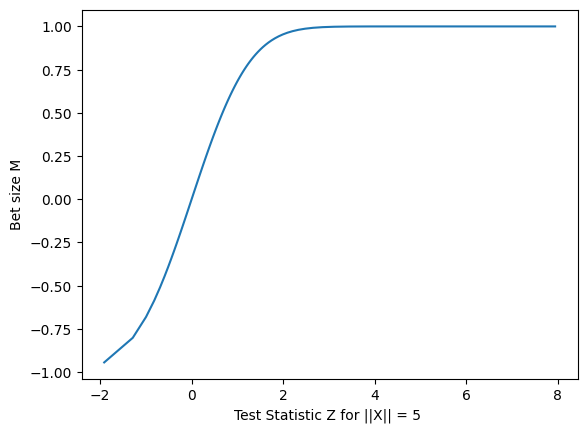

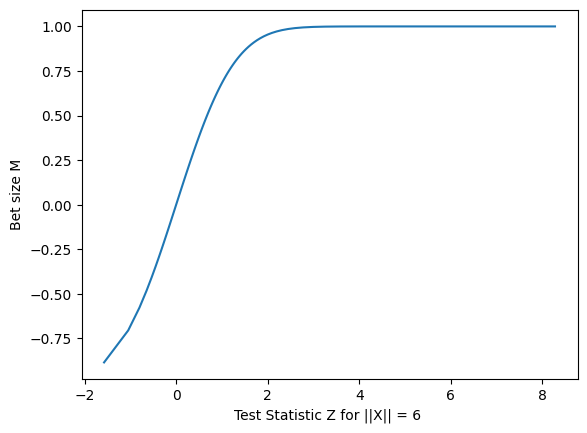

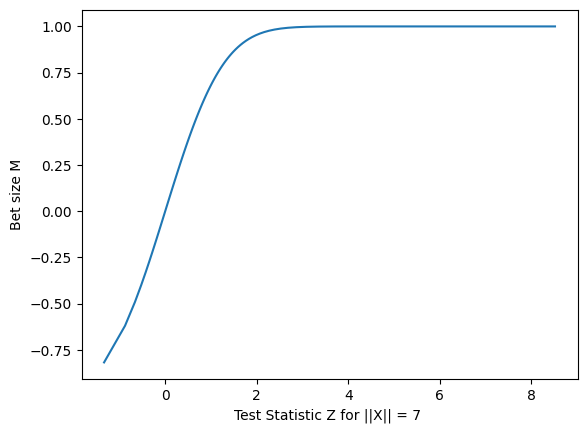

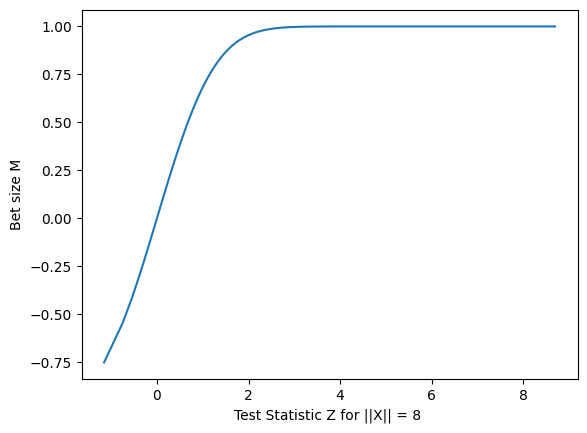

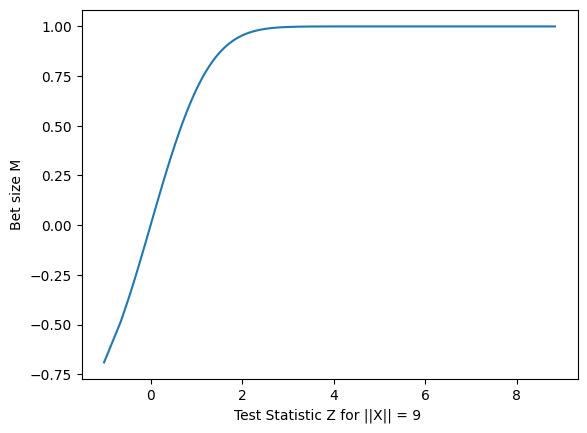

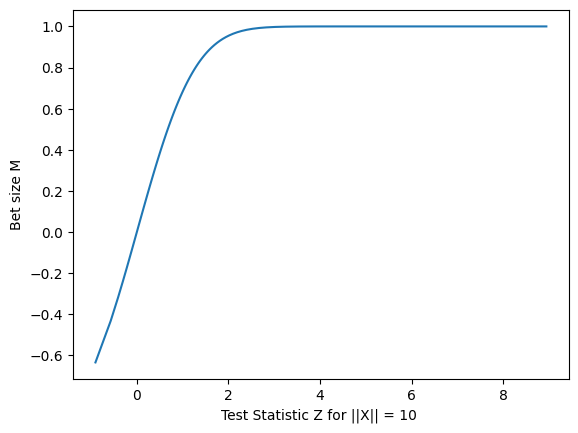

In [2]:
for x in range(2,11):
    p = (range(1,100,1))
    p =np.array(p)
    p = p/100
    z = []
    for prob in p:
        z.append((prob - (1/x))/(np.sqrt(prob*(1-prob))))
    z_cdf = scipy.stats.norm.cdf(z)
    m = 2*z_cdf-1

    plt.figure()
    plt.plot(z,m)
    plt.xlabel(f"Test Statistic Z for ||X|| = {x} ")
    plt.ylabel("Bet size M")
    plt.show()


Draw 10,000 random numbers from a uniform distribution with bounds U[.5, 1.]

In [3]:
random_numbers = np.random.uniform(0.5,1,10000)    

Compute the bet sizes m for ‖X‖ = 2.

In [4]:
z = []
x = 2
for prob in random_numbers:
    z.append((prob - (1/x))/(np.sqrt(prob*(1-prob))))
z_cdf = scipy.stats.norm.cdf(z)
m = 2*z_cdf-1

Assign 10,000 consecutive calendar days to the bet sizes

In [5]:
consecutive_days = pd.date_range(end=pd.Timestamp.today(), periods=10000)
print(consecutive_days)

DatetimeIndex(['1996-10-13 02:18:04.490012', '1996-10-14 02:18:04.490012',
               '1996-10-15 02:18:04.490012', '1996-10-16 02:18:04.490012',
               '1996-10-17 02:18:04.490012', '1996-10-18 02:18:04.490012',
               '1996-10-19 02:18:04.490012', '1996-10-20 02:18:04.490012',
               '1996-10-21 02:18:04.490012', '1996-10-22 02:18:04.490012',
               ...
               '2024-02-19 02:18:04.490012', '2024-02-20 02:18:04.490012',
               '2024-02-21 02:18:04.490012', '2024-02-22 02:18:04.490012',
               '2024-02-23 02:18:04.490012', '2024-02-24 02:18:04.490012',
               '2024-02-25 02:18:04.490012', '2024-02-26 02:18:04.490012',
               '2024-02-27 02:18:04.490012', '2024-02-28 02:18:04.490012'],
              dtype='datetime64[ns]', length=10000, freq='D')


Draw 10,000 random numbers from a uniform distribution with bounds
U [1, 25].

In [6]:
date_offsets = np.random.uniform(1,25,10000)
print(date_offsets)

[ 8.91705834 21.9059205   5.54703421 ... 13.74671643  6.27379407
 23.36539969]


Form a pandas series indexed by the dates in 2.b, and with values equal to the index shifted forward the number of days in 2.c. This is a t1 object similar to the ones we used in Chapter 3.

In [22]:
values = []
for value,date_offset in zip(consecutive_days,date_offsets):
    values.append(value + pd.to_timedelta(date_offset, unit = 'D' ))
print(values)
t1 = pd.DataFrame({'t1': np.squeeze(values), 'signal':np.squeeze(m)})
t1.index = consecutive_days
print(t1)

[Timestamp('1996-10-22 00:18:38.330848236'), Timestamp('1996-11-05 00:02:36.021402287'), Timestamp('1996-10-20 15:25:48.245527221'), Timestamp('1996-10-28 20:03:34.483783859'), Timestamp('1996-11-03 22:17:42.627916871'), Timestamp('1996-10-25 16:36:45.197448176'), Timestamp('1996-10-20 17:14:15.433877320'), Timestamp('1996-10-28 04:31:19.000587836'), Timestamp('1996-11-03 20:53:12.853146020'), Timestamp('1996-11-10 04:09:28.013251761'), Timestamp('1996-11-01 16:52:07.172933878'), Timestamp('1996-10-27 22:00:27.413089368'), Timestamp('1996-11-15 19:49:44.769774260'), Timestamp('1996-11-01 09:27:44.698917391'), Timestamp('1996-11-12 17:23:49.111379175'), Timestamp('1996-11-19 15:23:03.021467148'), Timestamp('1996-11-06 02:55:44.531947103'), Timestamp('1996-11-15 06:18:23.735218312'), Timestamp('1996-11-05 17:43:46.984249754'), Timestamp('1996-11-13 02:31:42.171917846'), Timestamp('1996-11-24 04:47:09.461668584'), Timestamp('1996-11-19 13:15:58.901050400'), Timestamp('1996-11-23 23:17:42.

Compute the resulting average active bets, following Section 10.4

In [23]:
avg = fml_lib.averageActiveSignals(t1)

In [24]:
print(avg)

1996-10-13 02:18:04.490012000    0.131837
1996-10-14 02:18:04.490012000    0.286533
1996-10-15 02:18:04.490012000    0.376963
1996-10-16 02:18:04.490012000    0.344206
1996-10-17 02:18:04.490012000    0.430786
                                   ...   
2024-03-10 12:16:12.845394504    0.689241
2024-03-10 20:13:20.789225476    0.900783
2024-03-11 18:39:00.852300107    0.956122
2024-03-13 04:50:09.328854112    0.999698
2024-03-22 11:04:15.022812804    0.000000
Length: 20000, dtype: float64
